<a href="https://colab.research.google.com/github/thuh66271-arch/TRI-TUE-NHA-TAO1/blob/main/Bai_tap_tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Cài đặt K-Means

Cho 1 tập hợp các điểm trên không gian tọa độ Oxy. Mỗi điểm sẽ có tọa độ (x, y) xác
định. Bài toán cần giải quyết là chia các điểm này thành K cụm khác nhau phân biệt.


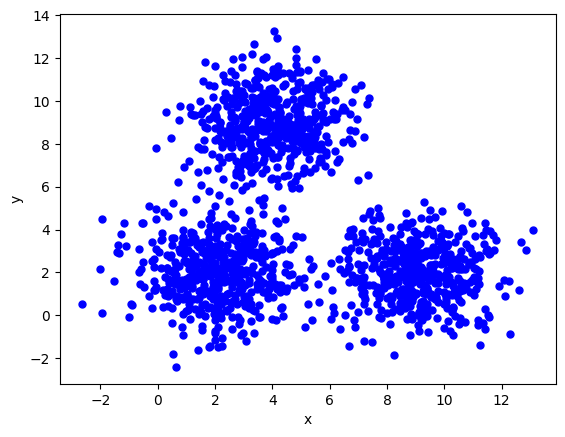

[[ 4.1172705  11.5082214 ]
 [ 8.67533048  2.60459657]
 [ 2.84119486  9.8893656 ]]


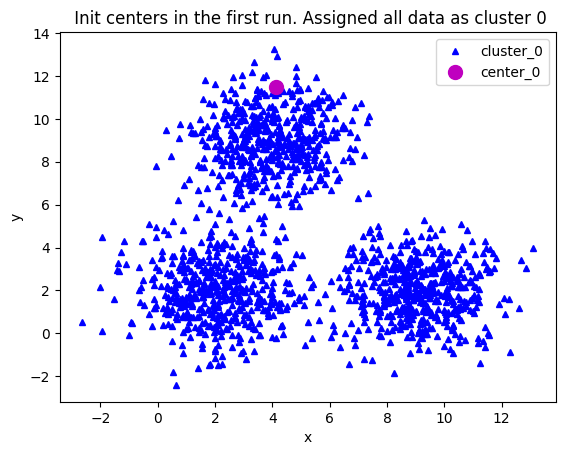

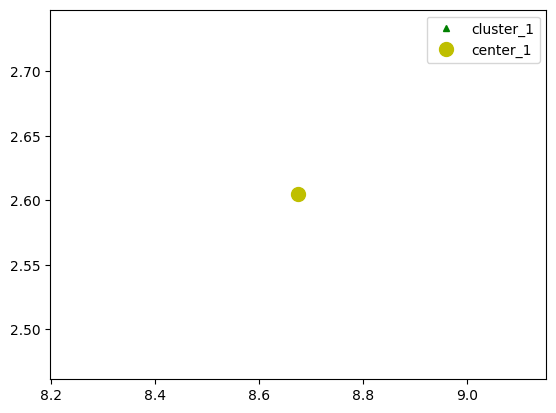

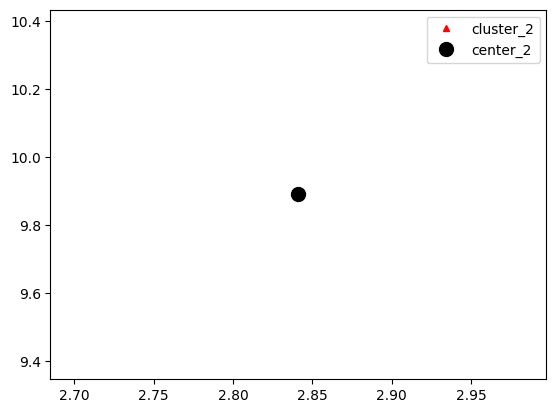

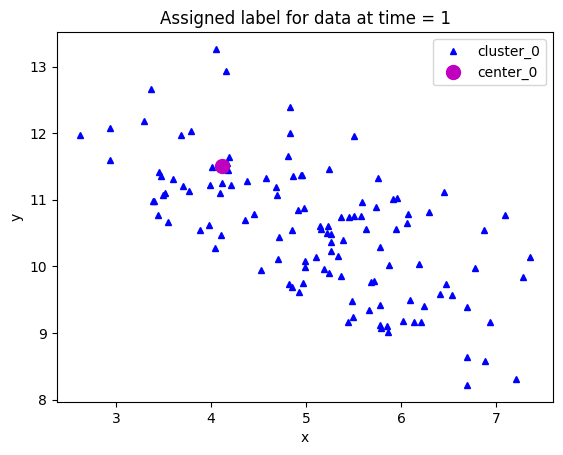

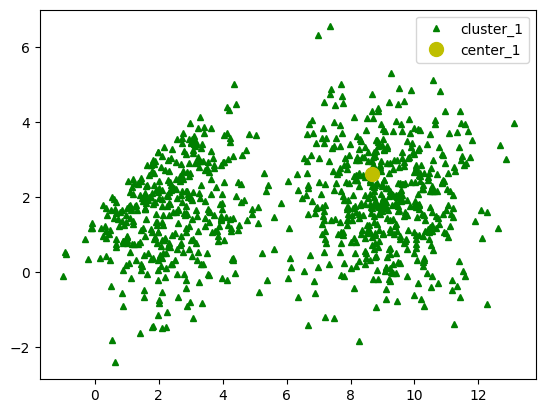

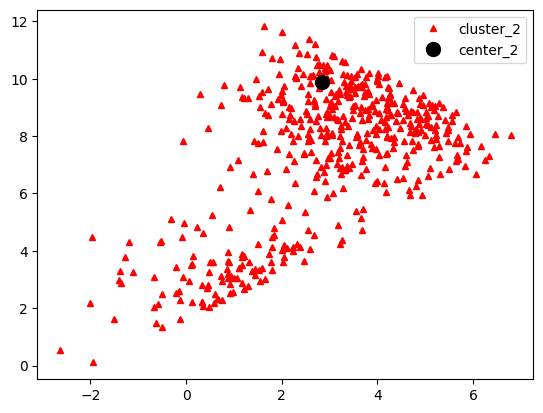

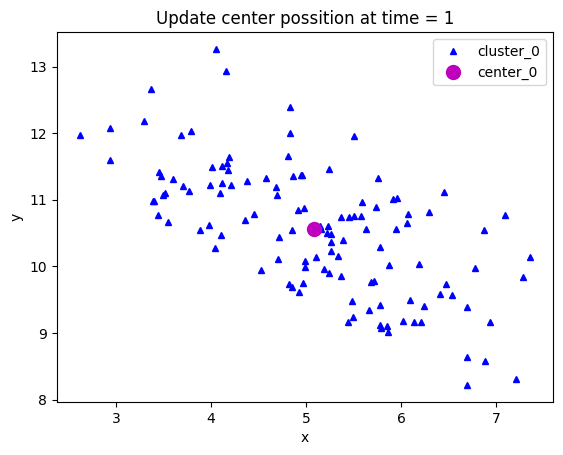

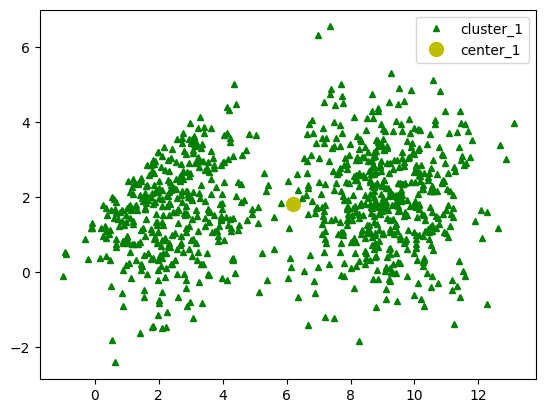

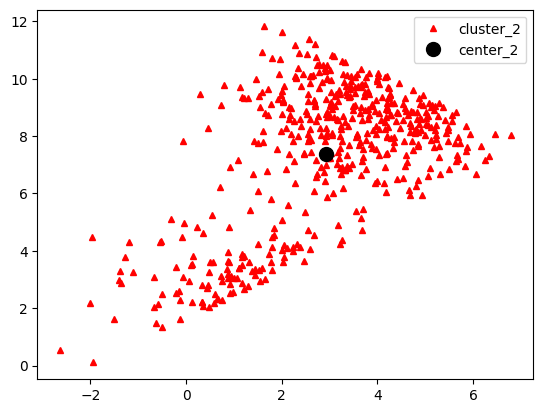

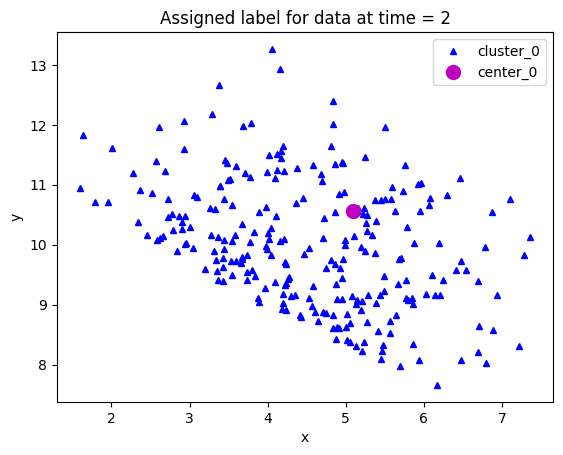

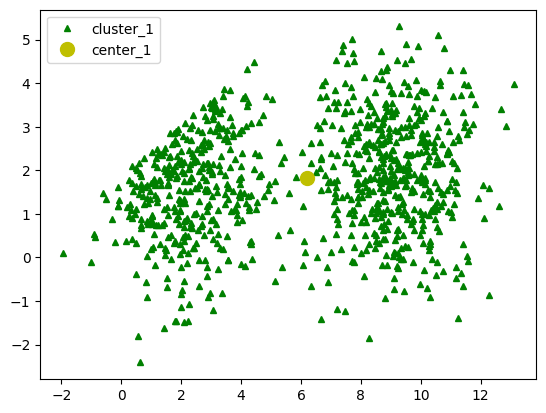

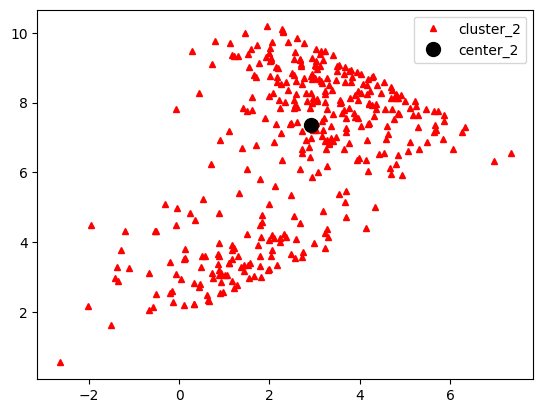

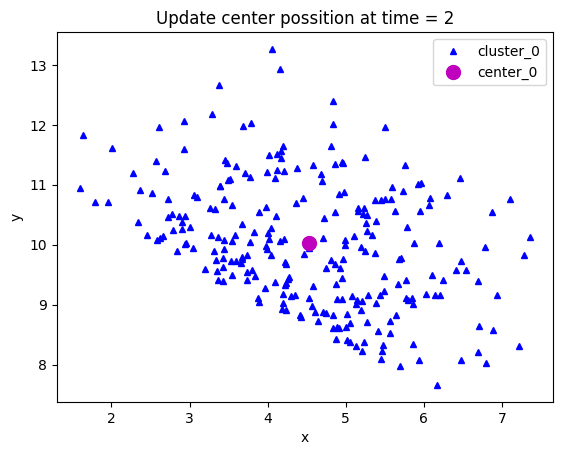

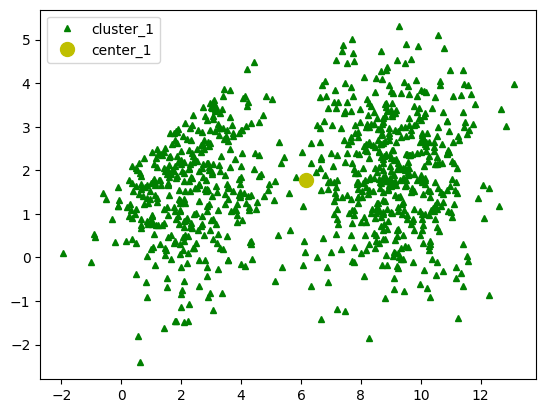

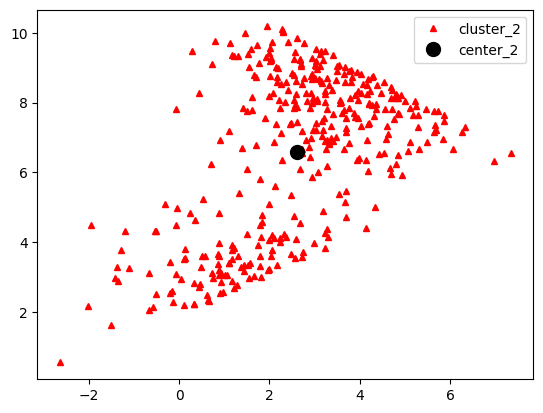

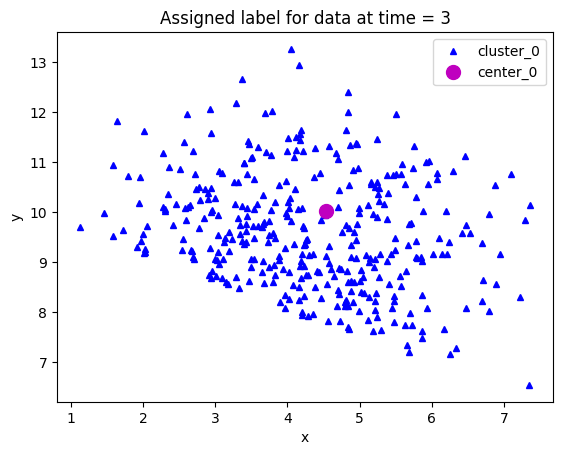

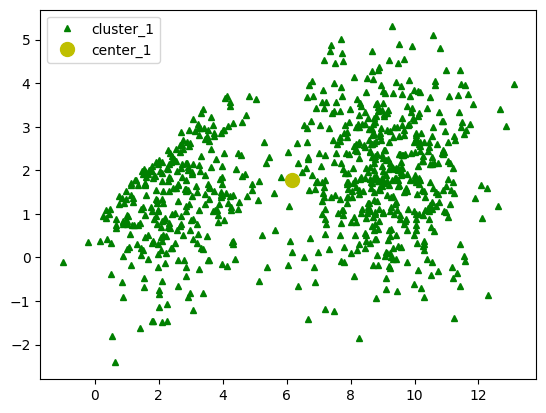

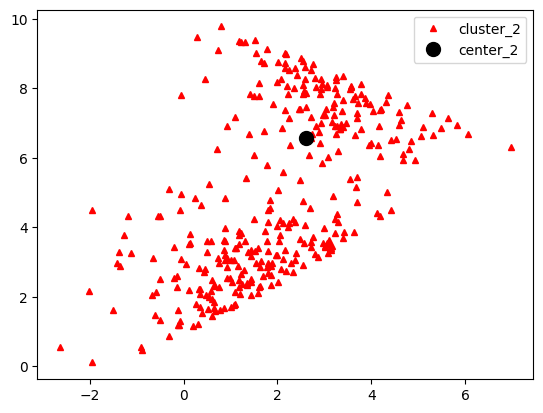

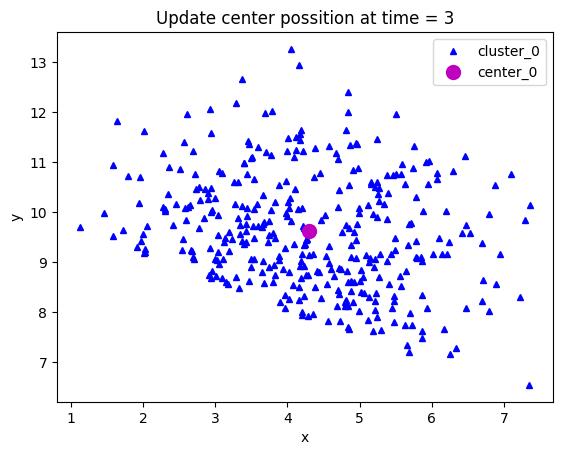

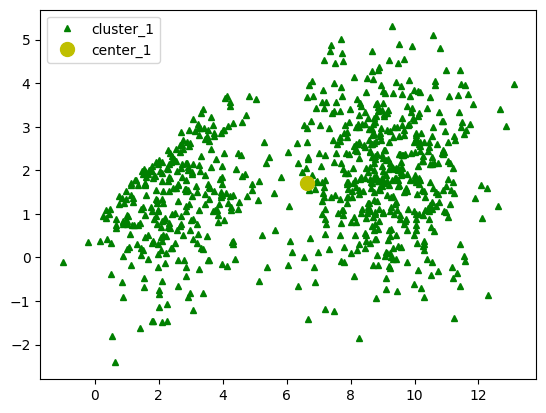

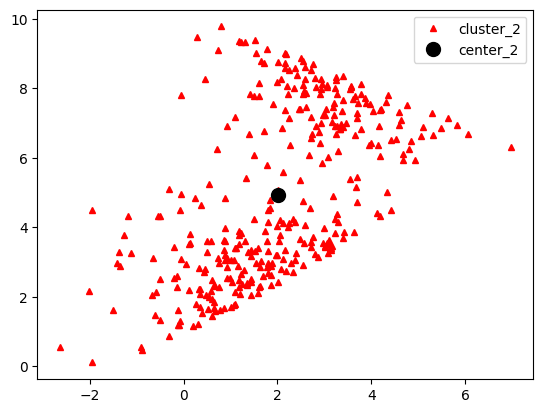

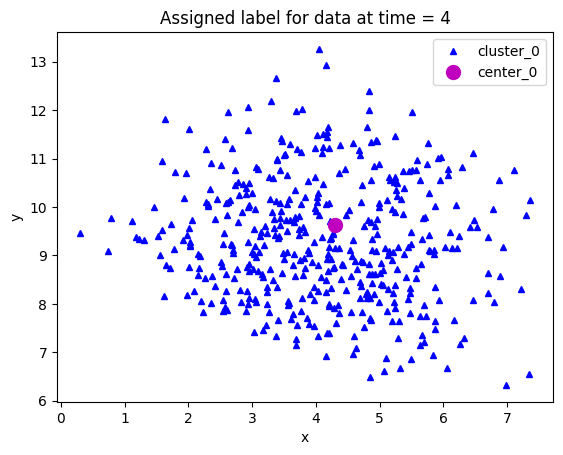

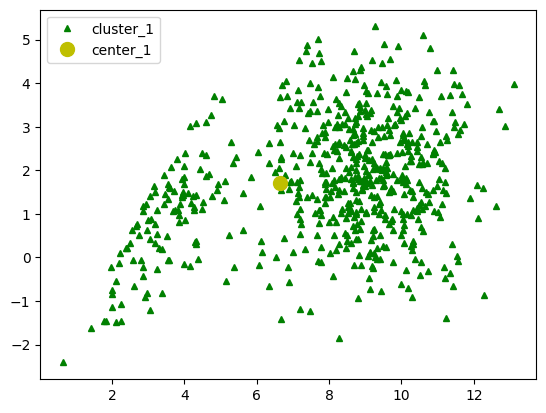

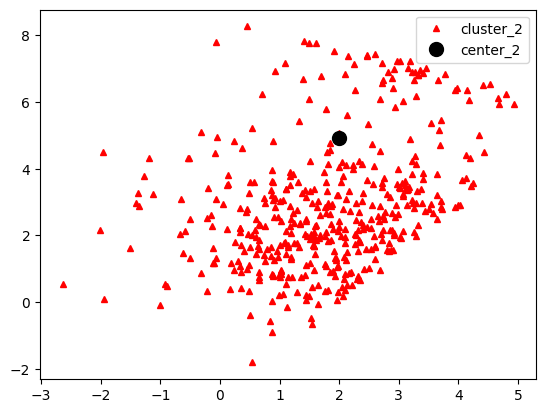

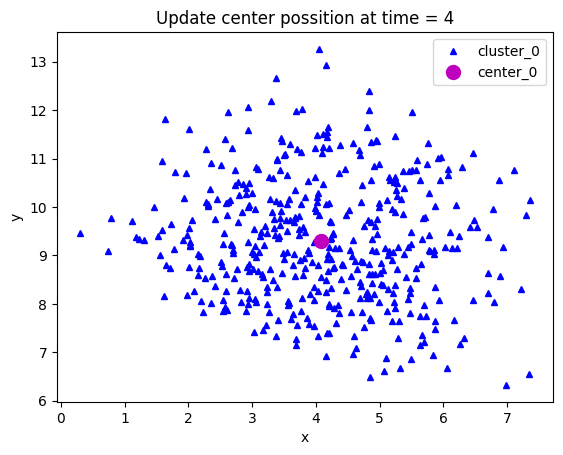

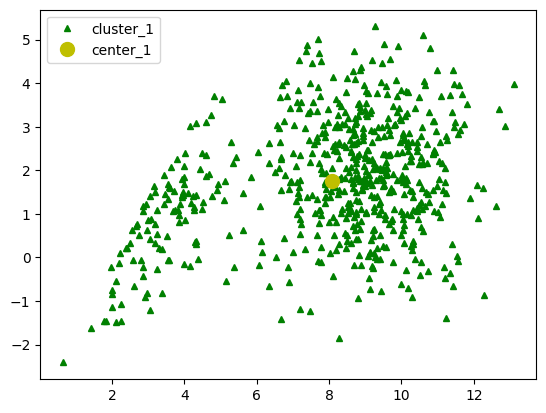

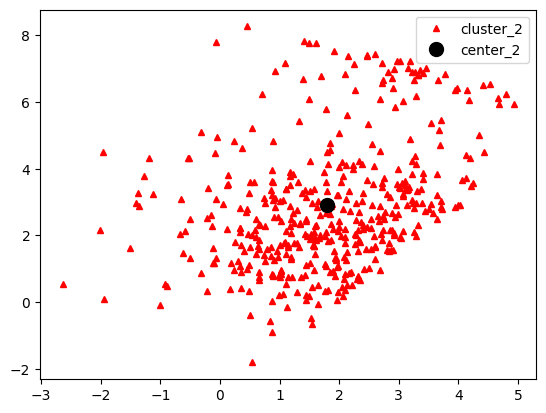

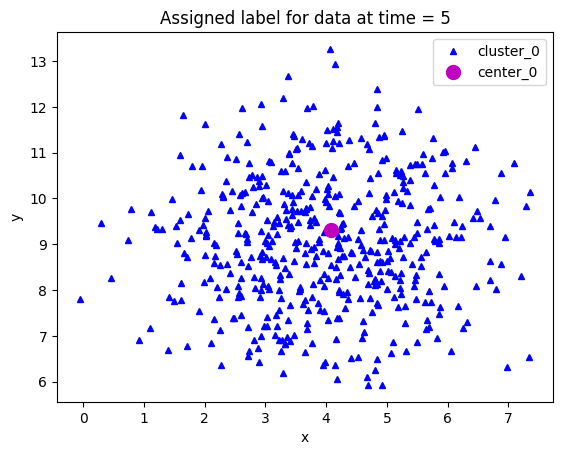

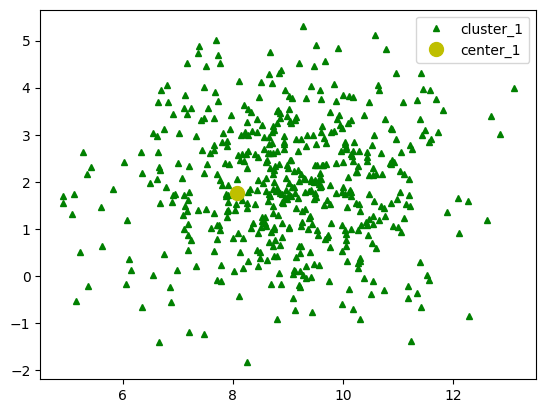

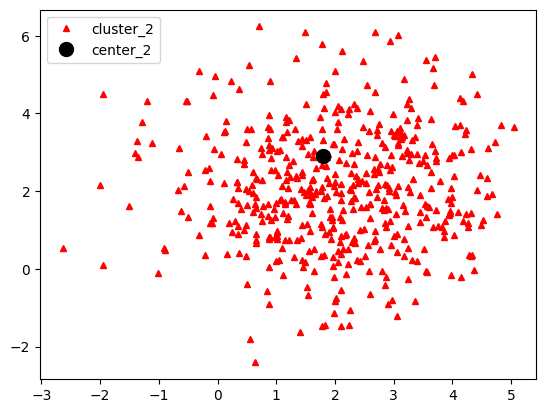

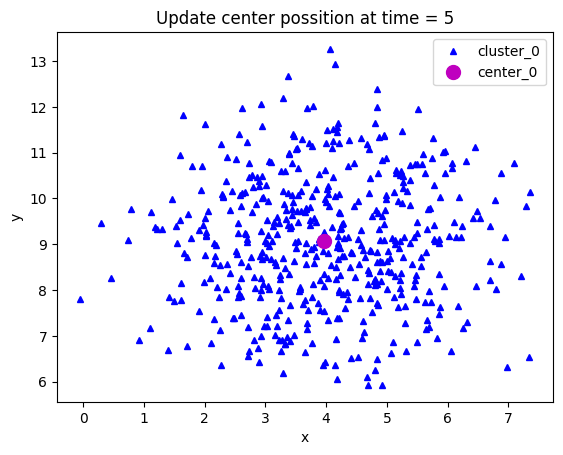

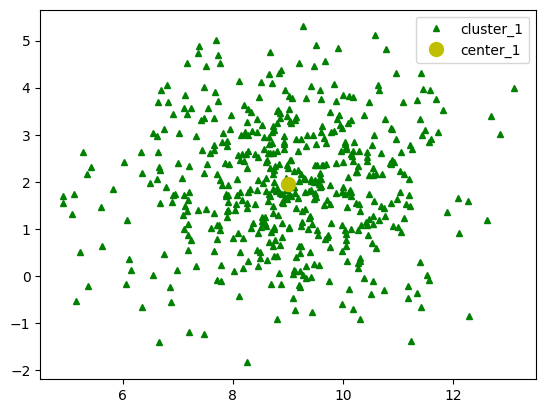

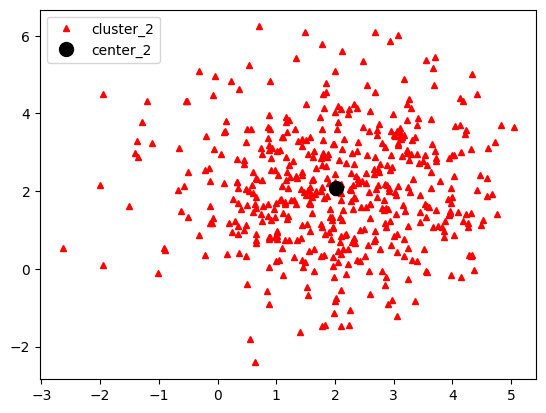

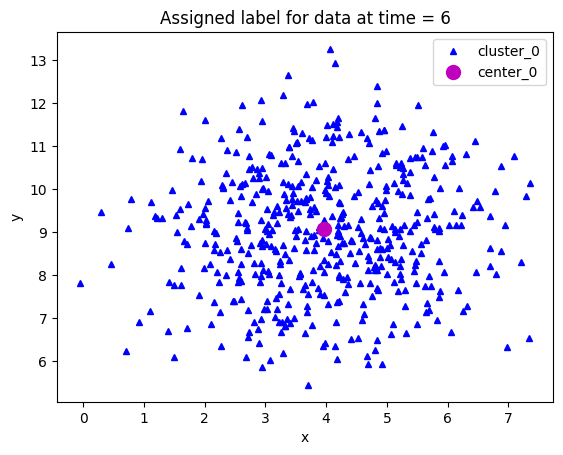

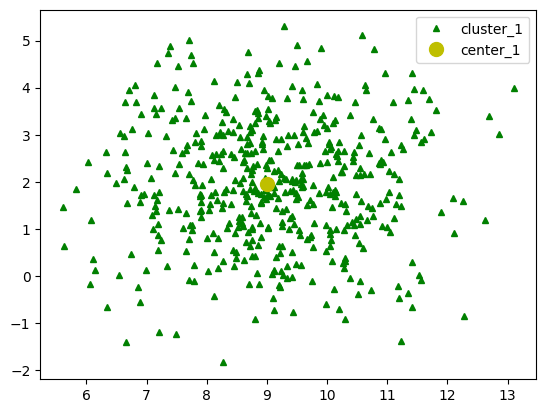

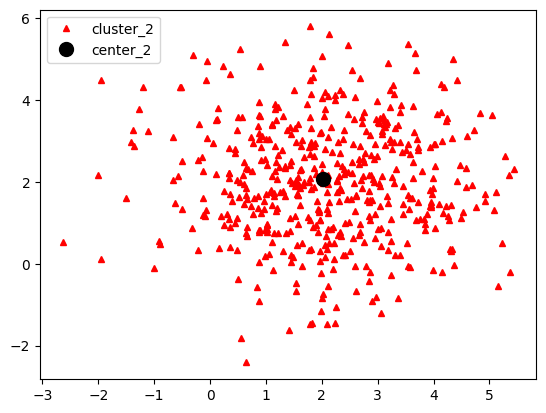

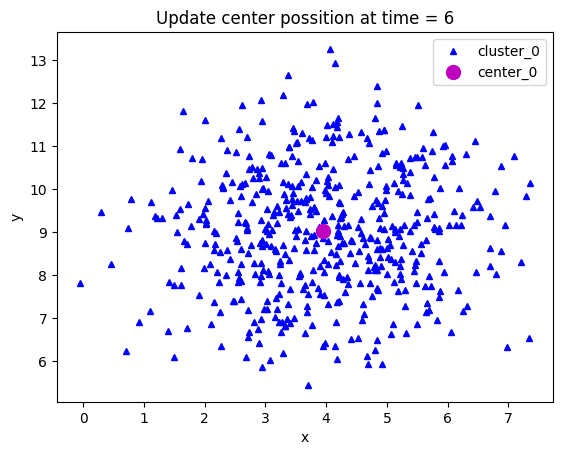

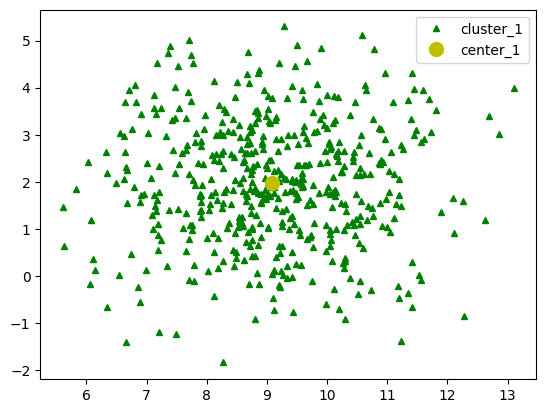

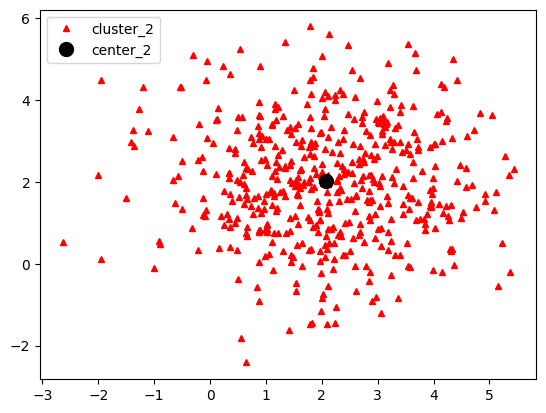

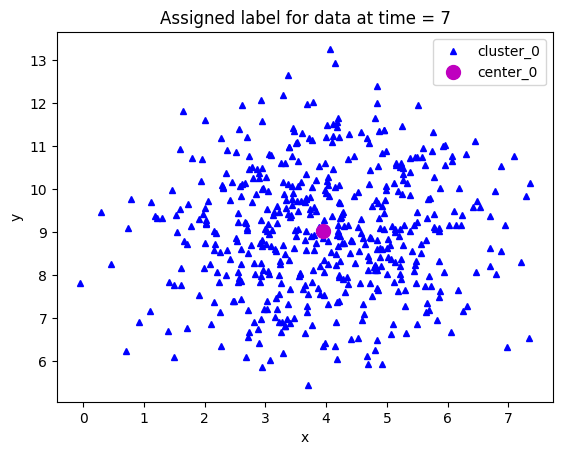

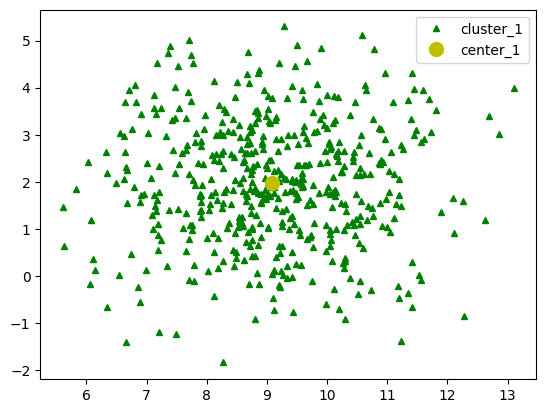

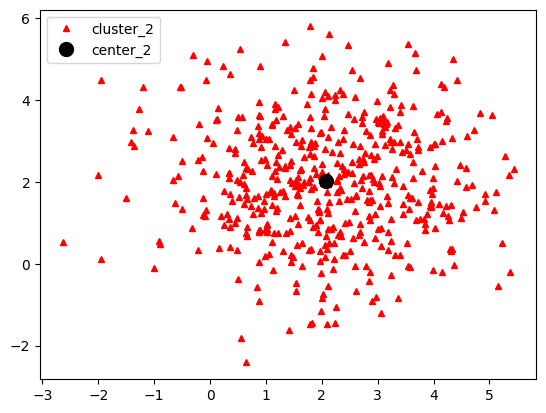

Done! Kmeans has converged after 6 times
[[3.94766548 9.02941398]
 [9.08283559 1.97331034]
 [2.07100066 2.01159221]]


In [3]:
# 1. Thư viện cần thiết
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

# 2. khởi tạo 500 điểm dữ liệu xung quanh 3 tâm cụm (2,2) (9,2) va (4,9)
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

# 3. Xem phân bố dữ liệu mà chúng ta vừa tạo ra
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

# Sử dụng kyc thuật k-means để tìm tâm 3 cụm từ dữ liệu vừa tạo ở bước 2
# 4. Viết hàm khởi tạo n_cluster=3 tâm cụm
def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

# 5. Hàm xác định tâm cụm
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

# 6. Hàm cập nhật lại vị trí của các tâm cụm.
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# 7. Hàm Kiểm tra tính hội tụ.
def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

# 8. Hàm vẽ lên đồ thị để kết quả để quan sát.
# Hàm này dùng để vẽ dữ liệu lên đồ thị
# Random color chỉ làm việc với k &lt;= 4
# Nếu bạn thay đổi k &gt; 4, hãy sửa lại phần random color nhé
# Chỉ sử dụng trong bài toán này thôi nhé.
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
    for i in range(n_cluster):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4,label='cluster_' + str(i)) # Vẽ cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',markersize=10, label='center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
        plt.legend() # Hiện bảng chú thích
        plt.show()

# 9. Toàn bộ thuật toán k-means
def kmeans(init_centes, init_labels, X, n_cluster):
    centers = init_centes
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = '  + str(times + 1))
        times += 1
    return (centers, labels, times)

# 10. gọi hàm kmeans phía trên để thực thi.
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, ' Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')
print(centers)

2. Cài đặt K-NN

Cho 1 tập hợp các điểm trên không gian tọa độ Oxy. Mỗi điểm sẽ có tọa độ (x, y) xác
định. Sử dụng phương pháp k-NN với các dữ liệu trong không gian 2 chiều.

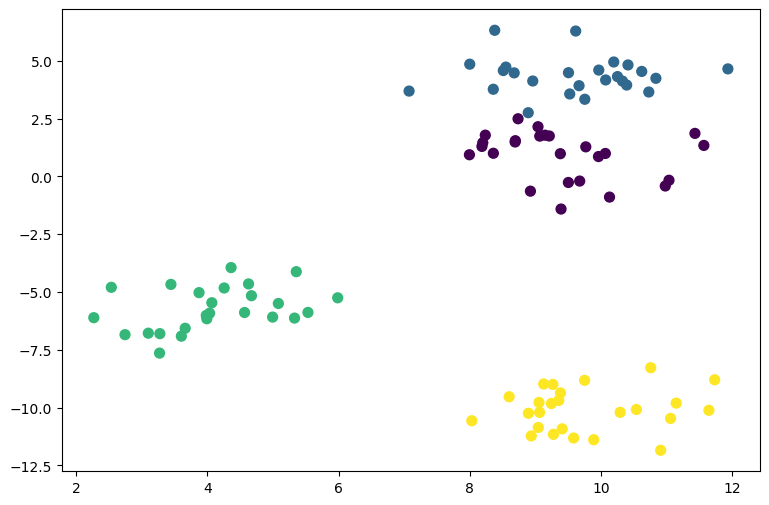

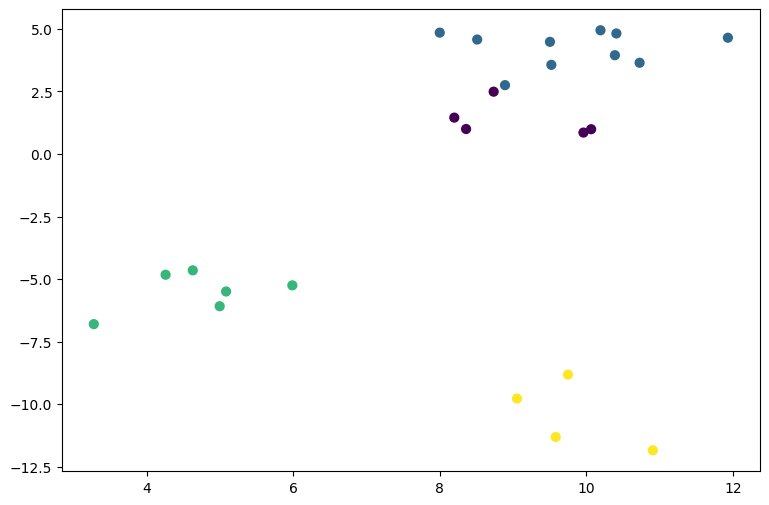

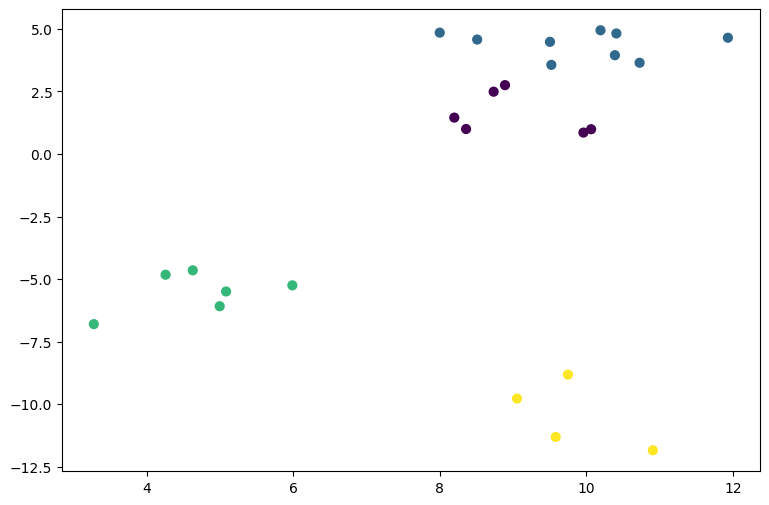

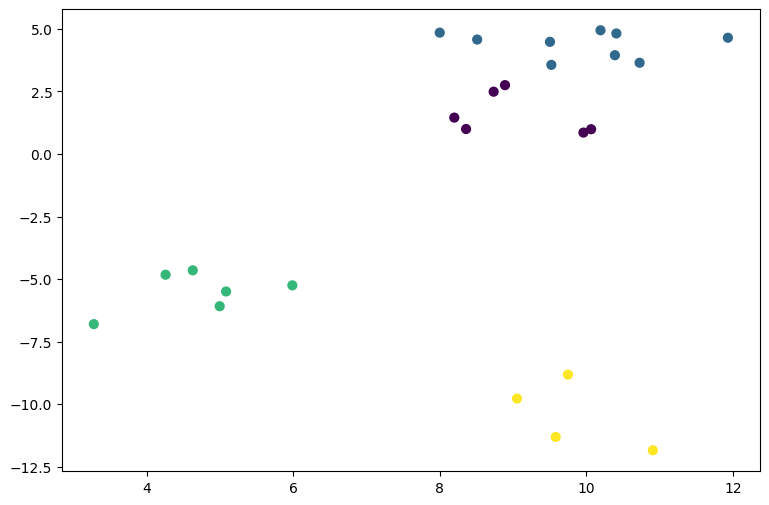

{'n_neighbors': np.int64(2)}
[0]


In [5]:
# 1. import các thư viện cần thiết.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test sets

# 2. Khởi tạo một tập dữ liệu với 100 mẫu được chia thành 4 lớp và số đặc trưng là 2. Số lượng mẫu, số đặc trưng và lớp có thể dễ dàng được điều chỉnh bằng cách sử dụng các tham số liên quan. Chúng ta cũng có thể điều chỉnh độ phân tán (bằng cách điều chỉnh độ lệch chuẩn) của mỗi cụm (hoặc lớp).
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
cluster_std = 1, random_state = 4)

# 3. Xem phân bố của dữ liệu mà chúng ta vừa tạo ra.
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.show()

# Sử dụng kĩ thuật k-NN để tìm k tốt nhất trên bộ dữ liệu đã được tạo ở bước 2. Đánh giá theo phương pháp nhìn hình.
# 4. Chúng ta chia tập dữ liệu thành các tập hợp dữ liệu đào tạo (training set) 75% và kiểm tra (test set) 25%. Chúng ta đào tạo mô hình cho k và sau đó kiểm tra nó bằng cách sử dụng các phần khác nhau của tập dữ liệu.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=40)
plt.show()

# 5. Huấn luyện và đánh giá (nhìn hình) với k=5 so với hình gốc ở bước 4.
knn5 = KNeighborsClassifier(5) # k=5
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= "o", s=40)
plt.show()

# 6. Huấn luyện và đánh giá (nhìn hình) với k=1 so với hình gốc ở bước 4.
knn1 = KNeighborsClassifier(1) # k=1
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=40)
plt.show()

# 7. Kết quả dường như rất giống nhau vì chúng ta đã sử dụng một tập dữ liệu có kích thước nhỏ. Nếu sử dụng tập dữ liệu có kích thước lớn hơn, chúng ta sẽ thấy có những điểm khác biệt.
# Sử dụng kĩ thuật k-NN để tìm k tốt nhất trên bộ dữ liệu đã được tạo ở bước 2. Đánh giá theo tự động kiểm tra nhiều giá trị k.
# 4. Làm thế nào để chúng ta tìm thấy giá trị k tối ưu? Scikit-learning cung cấp chức năng GridSearchCV cho phép chúng ta dễ dàng kiểm tra nhiều giá trị k khác nhau.
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,10)}, cv=5)
knn_grid.fit(X,y)
print (knn_grid.best_params_)

# cv = 5 về cơ bản chia tập dữ liệu thành 5 tập con. GridSearchCV sẽ thực hiện 5 lần lặp để 75% cho tập dữ liệu đào tạo và 25% cho tập dữ liệu kiểm tra tại mỗi thời điểm. Bằng cách này, chúng ta có thể sử dụng tất cả các điểm dữ liệu cho cả đào tạo và kiểm tra.
# Viết hàm dán nhãn dữ liệu dùng kĩ thuật k-NN dựa vào dữ liệu được tạo ở bước 2 và trọng số k tìm được theo 1 trong 2 cách trên.
def KNN(X_train,X_test,y_train,k):
    num_test = X_test.shape[0] # số lượng dữ liệu test
    num_train = X_train.shape[0] # số lượng dữ liệu train
    # y_pred là một ma trận, mỗi hàng tương ứng là khoảng cách của một điểm dữ liệu trong tập test đối với tất cả các điểm dữ liệu trong tập train
    y_pred = np.zeros((num_test,num_train))
    # duyệt qua mỗi điểm trong tập test
    for i in range(num_test):
    # tương ứng một điểm trong tập test sẽ duyêt qua hết bộ train
        for j in range(num_train):
        # tính khoảng cách tới tập train
            y_pred[i,j] = np.sqrt(np.sum(np.power(X_test[i,:]- X_train[j,:],2)))
    results = []
    # sắp xếp theo chiều tăng dần khoảng cách
    for i in range(len(y_pred)):
        zipped = zip(y_pred[i,:],y_train)
        res = sorted(zipped,key = lambda x:x[0])
        results_topk = res[:k]
        # Đếm số lượng của mỗi class
        classes = {}
        for _,j in results_topk:
            j = int(j)
            if j not in classes:
                classes[j] = 1
            else:
                classes[j] = classes[j] + 1
         # trả về class có số lượng nhiều nhất
        results.append(max(classes,key = classes.get))
    return np.array(results)
(X,y) = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1, random_state = 4)
X_test=np.array([(1,3)])
results = KNN(X,X_test,y,3)
print (results)

III. Bài tập ở lớp

Bài 1. Cài đặt lại thuật toán k-means.

Bài 2. Cài đặt lại thuật toán k-NN với 2 cách đánh giá trọng số k.

Bài 3. Cài đặt ứng dụng demo cho 2 thuật toán trên.

--- K-MEANS CLUSTERING ---
Tọa độ khởi tạo ban đầu của các tâm cụm:
 [[1.77831876 8.20828613]
 [0.75609532 1.09566492]
 [3.29541022 8.09705225]]


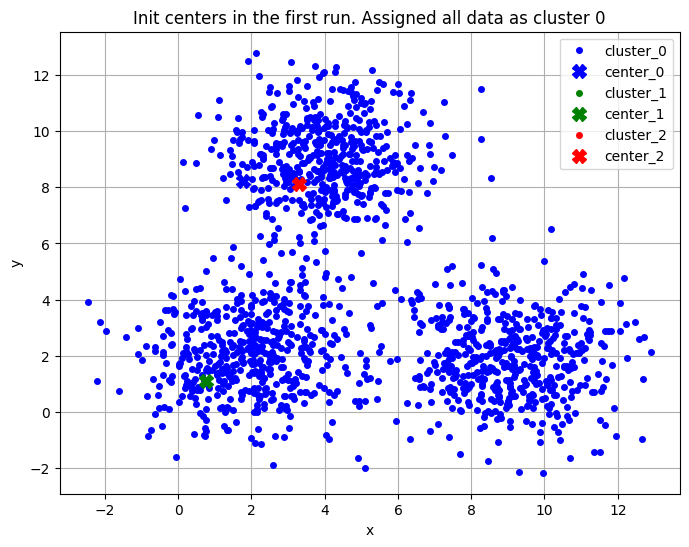

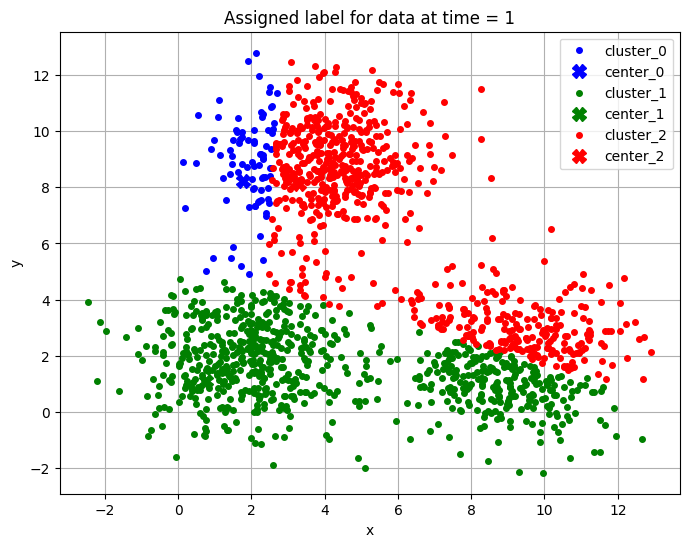

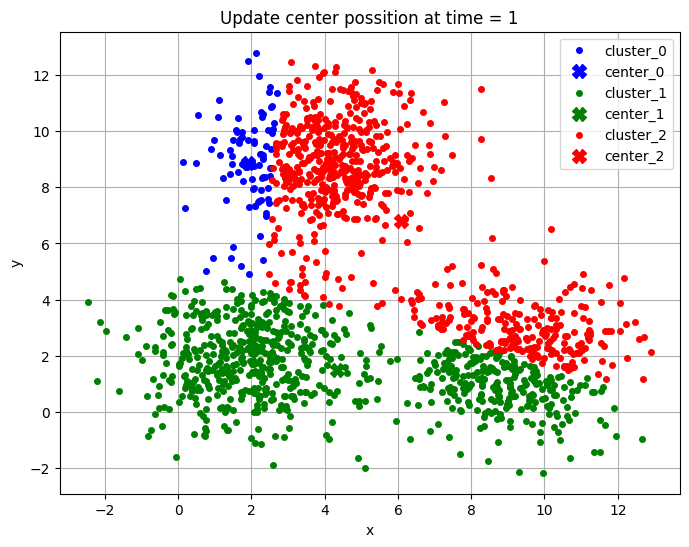

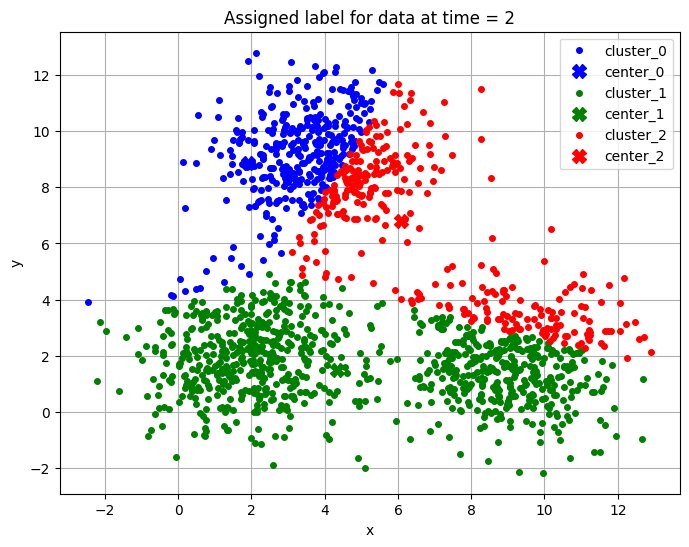

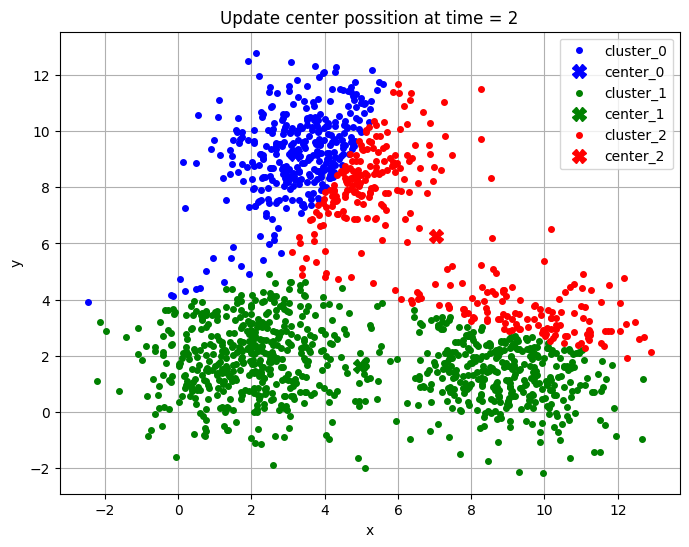

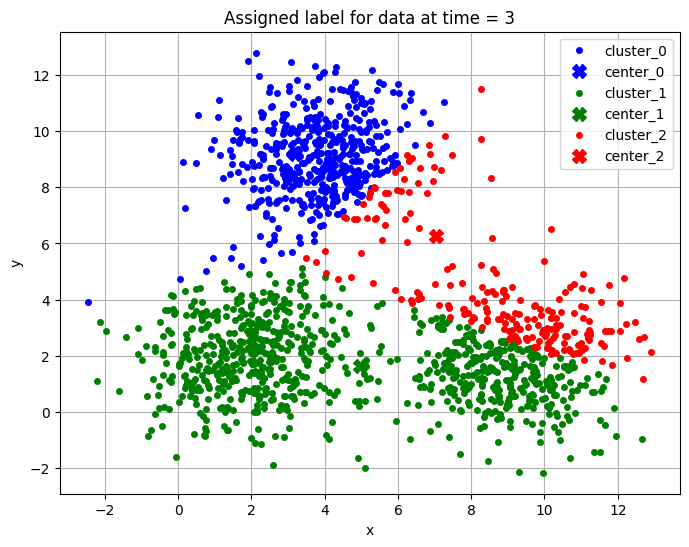

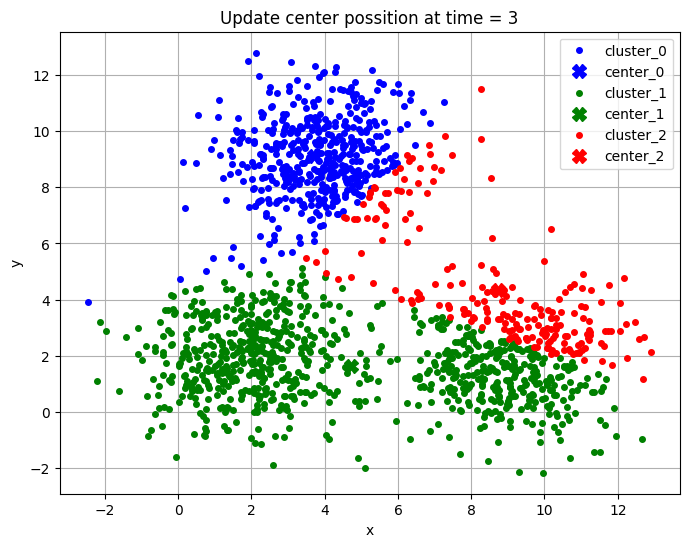

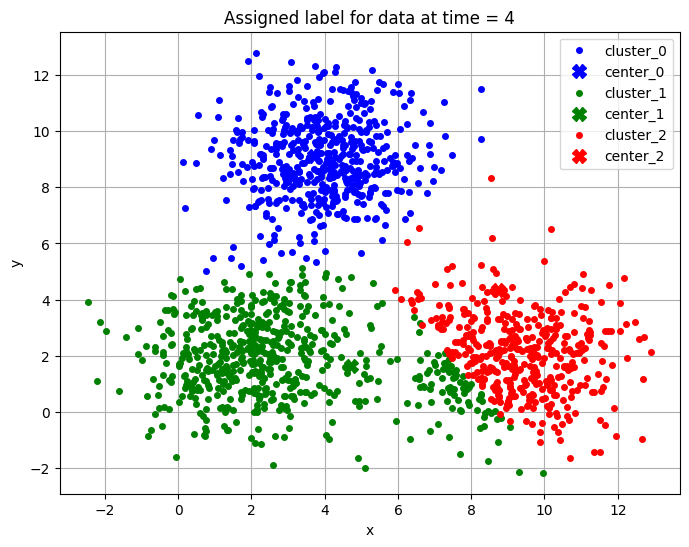

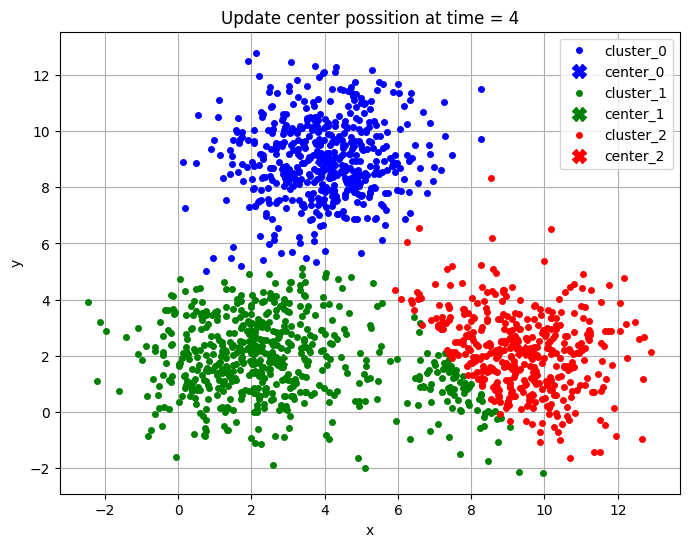

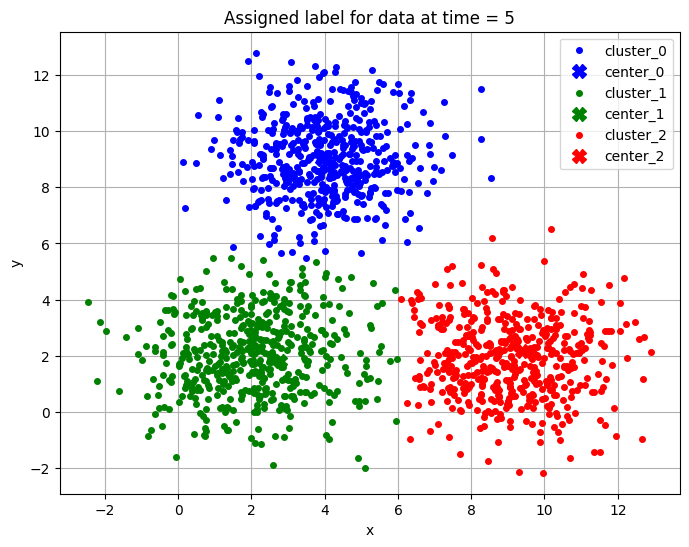

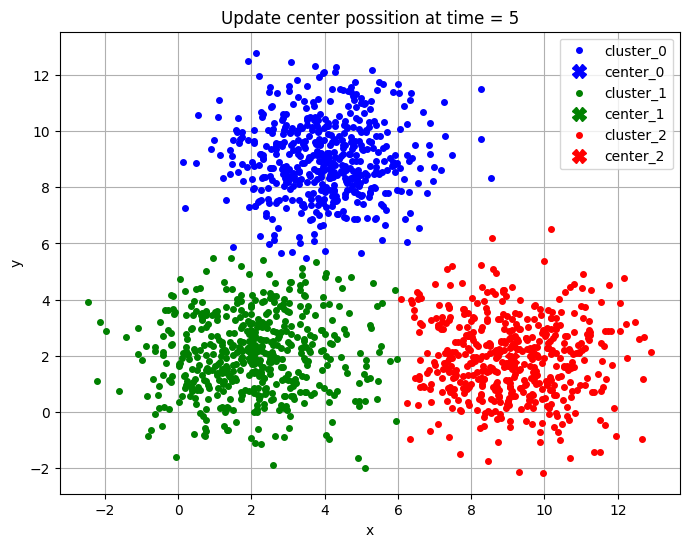

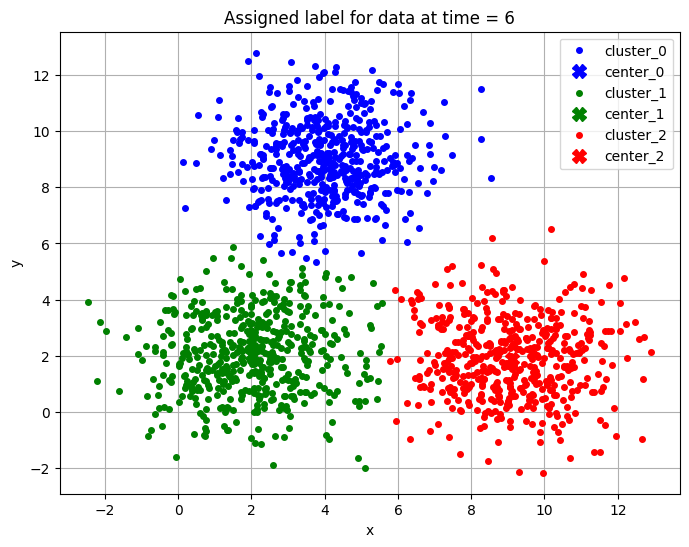

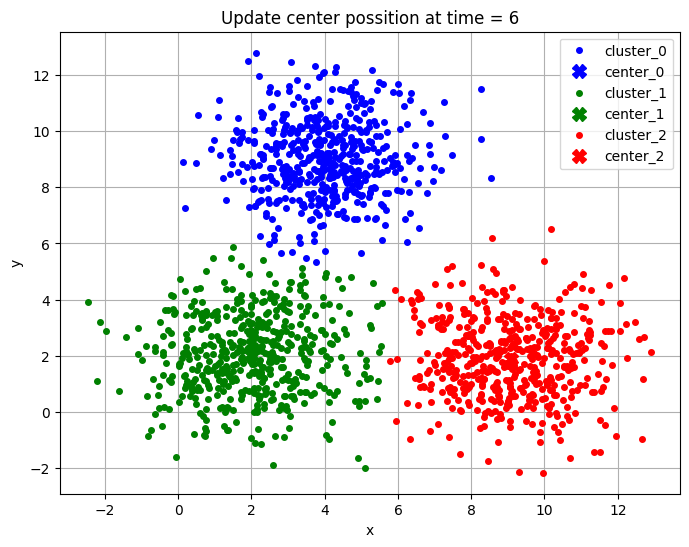

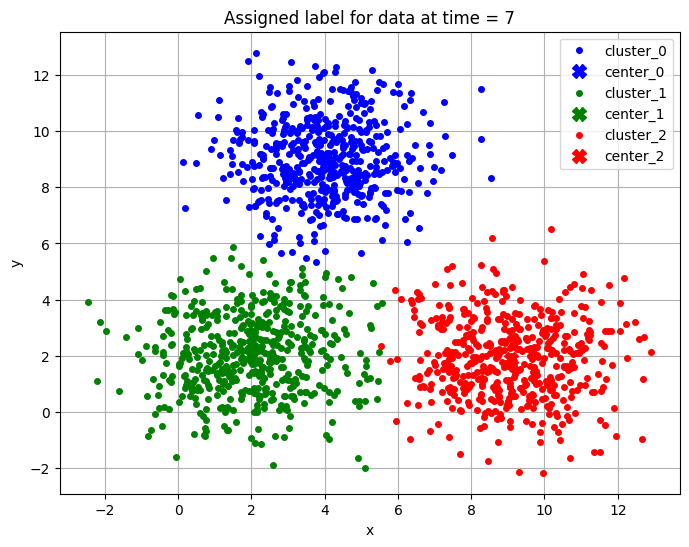

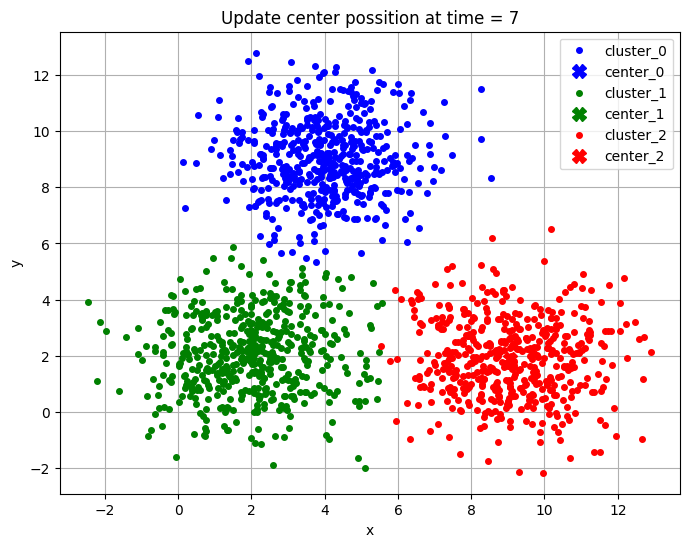

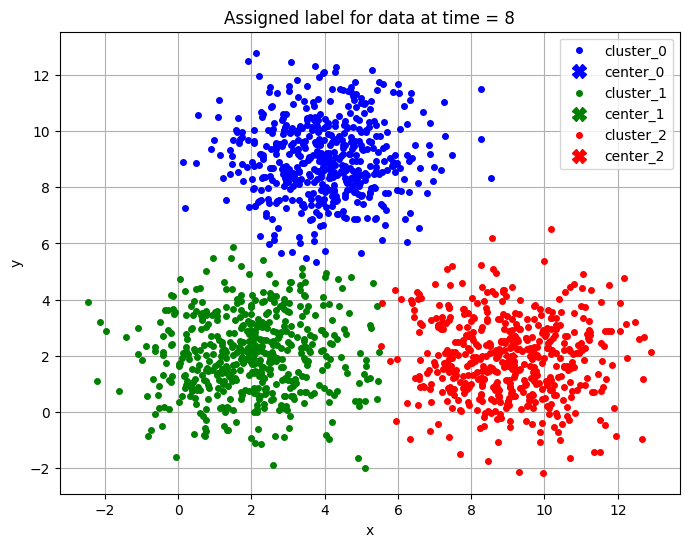

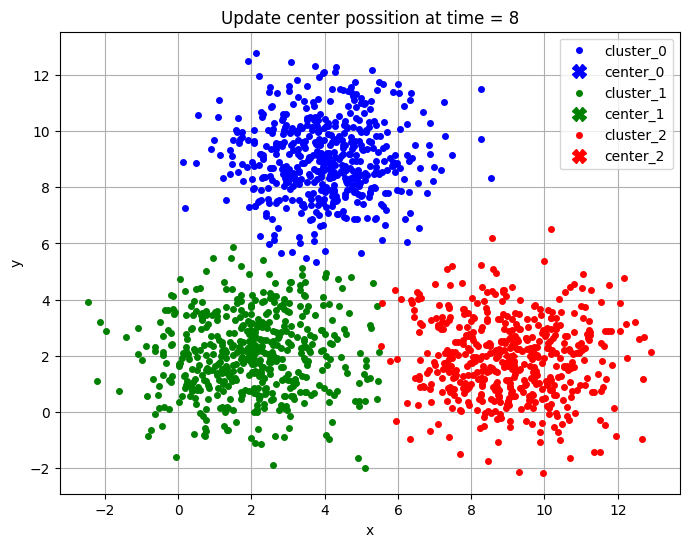

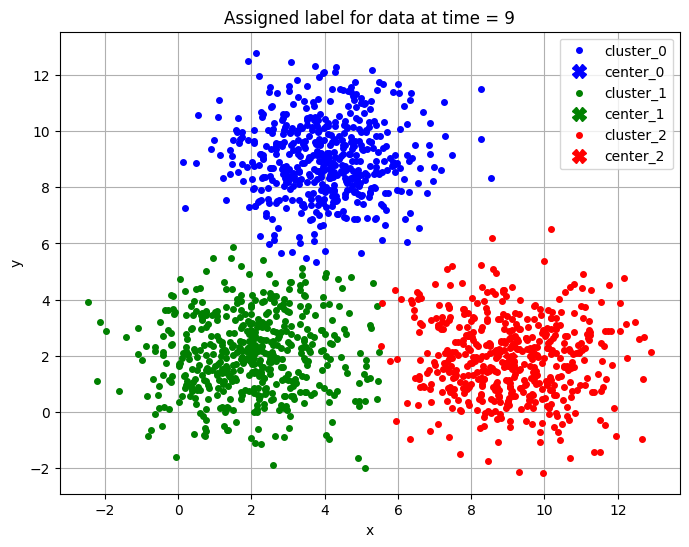


Done! Kmeans has converged after 8 times
Tọa độ tâm cụm cuối cùng:
 [[3.98016473 9.02957704]
 [1.9667052  2.04161647]
 [9.06251694 1.88488227]]


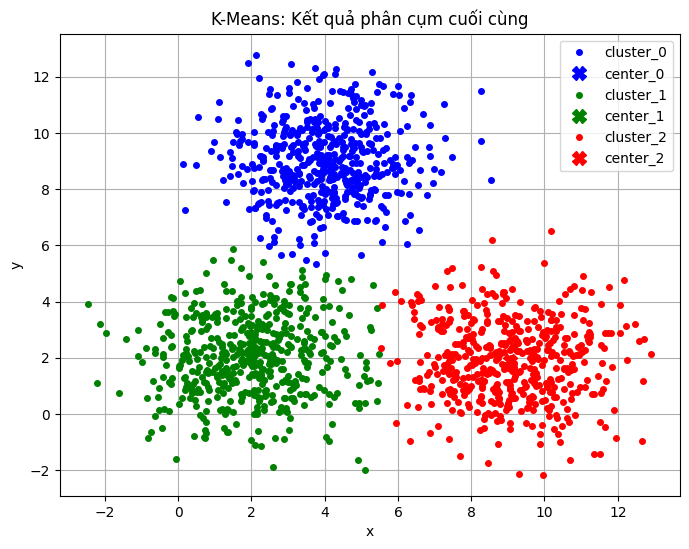

In [7]:
# Bài 1. Cài đặt lại thuật toán k-means.
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách
import random

# --- 1. KHỞI TẠO DỮ LIỆU ---
# Khởi tạo 500 điểm dữ liệu xung quanh 3 tâm cụm (2, 2), (9, 2) và (4,9).
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)

# --- 2. ĐỊNH NGHĨA CÁC HÀM CỦA K-MEANS ---

def kmeans_init_centers(X, n_cluster):
    # random k index beetween 0 and shape(X) without duplicate index.
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def kmeans_has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))

def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    plt.figure(figsize=(8, 6))
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị

    for i in range(n_cluster):
        data = X[labels == i, :] # lấy dữ liệu của cụm i
        # Vẽ cụm i lên đồ thị
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + 'o', markersize=4,
                 label='cluster_' + str(i))
        # Vẽ tâm cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1], plt_colors[i] + 'X', markersize=10,
                 label='center_' + str(i))

    plt.legend() # Hiện bằng chú thích
    plt.grid(True)
    plt.show()

def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    # Bước khởi tạo ban đầu (chỉ vẽ nhãn khởi tạo)
    kmeans_visualize(X, init_centers, init_labels, n_cluster,
                     'Init centers in the first run. Assigned all data as cluster 0')

    while True:
        # Gán nhãn
        labels = kmeans_predict_labels(X, centers)

        # Trực quan hóa việc gán nhãn
        kmeans_visualize(X, centers, labels, n_cluster,
                         'Assigned label for data at time = ' + str(times + 1))

        # Cập nhật tâm cụm
        new_centers = kmeans_update_centers(X, labels, n_cluster)

        # Kiểm tra hội tụ
        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers

        # Trực quan hóa việc cập nhật tâm
        kmeans_visualize(X, centers, labels, n_cluster,
                         'Update center possition at time = ' + str(times + 1))

        times += 1

    return (centers, labels, times)

# --- 3. THỰC THI THUẬT TOÁN ---
print("--- K-MEANS CLUSTERING ---")
random.seed(42) # Đảm bảo tính lặp lại
init_centers = kmeans_init_centers(X, n_cluster)
print("Tọa độ khởi tạo ban đầu của các tâm cụm:\n", init_centers)
init_labels = np.zeros(X.shape[0])

centers_final, labels_final, times_final = kmeans(init_centers, init_labels, X, n_cluster)

print('\nDone! Kmeans has converged after', times_final, 'times')
print("Tọa độ tâm cụm cuối cùng:\n", centers_final)
kmeans_visualize(X, centers_final, labels_final, n_cluster, 'K-Means: Kết quả phân cụm cuối cùng')

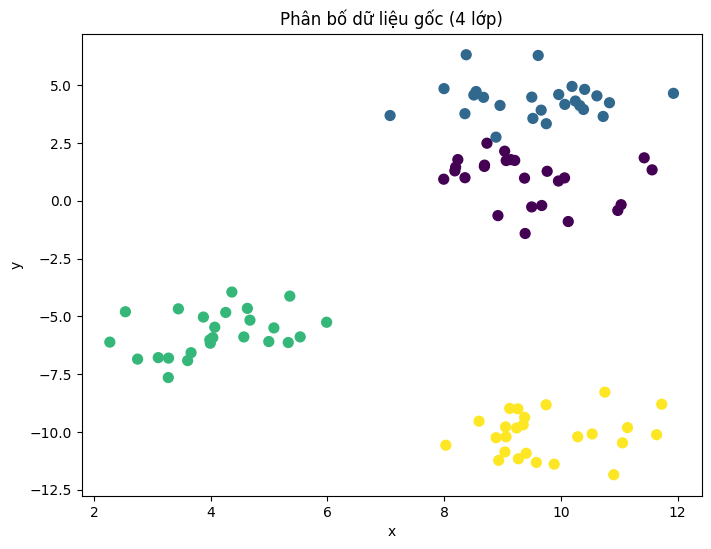

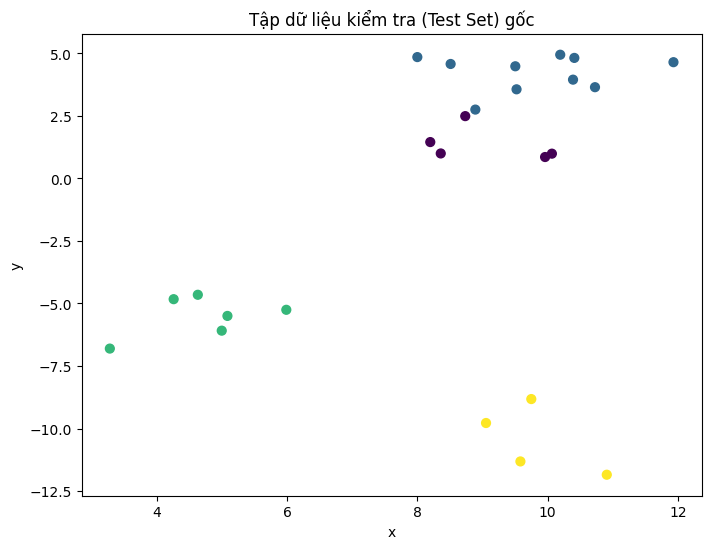

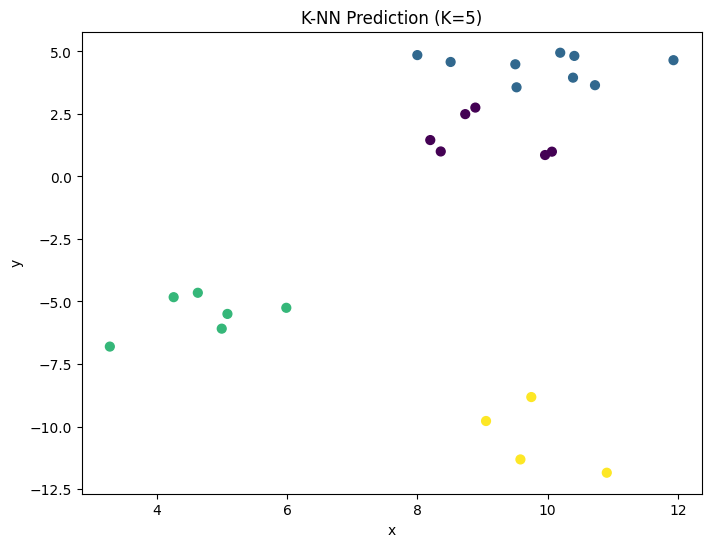

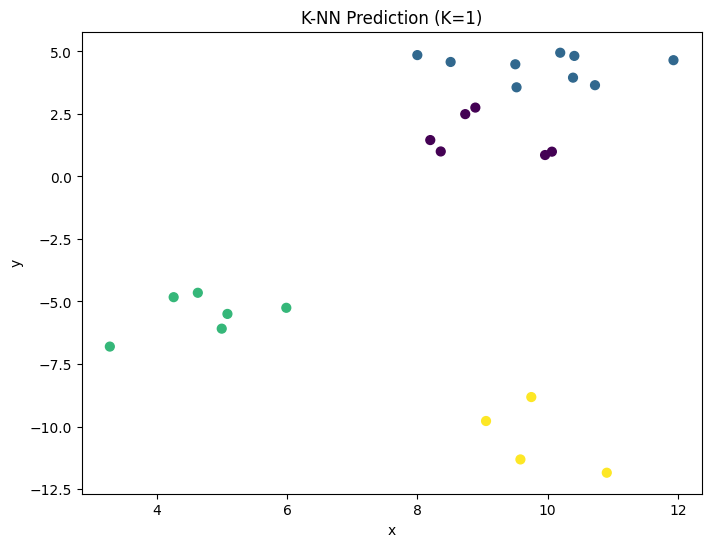


--- TÌM K TỐI ƯU BẰNG GRIDSEARCHCV ---
Giá trị K tối ưu tìm được: 2
Độ chính xác tốt nhất (Best Score): 0.9900


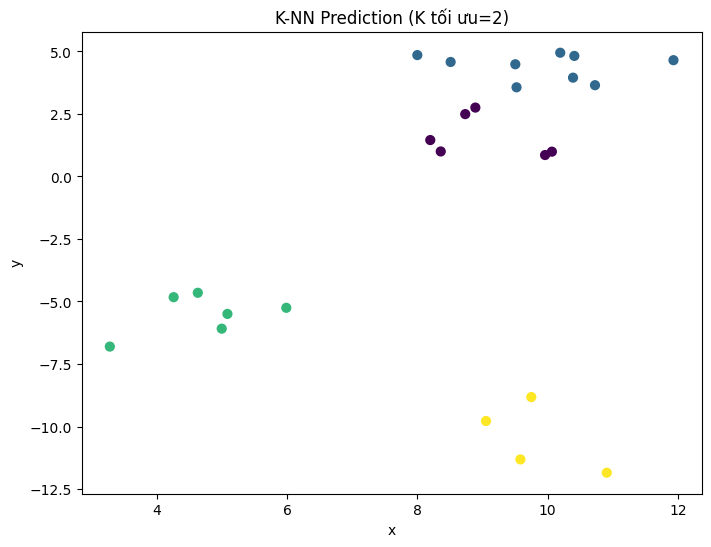

In [9]:
# Bài 2. Cài đặt lại thuật toán k-NN với 2 cách đánh giá trọng số k.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.model_selection import train_test_split, GridSearchCV # train and test sets

# --- 1. KHỞI TẠO DỮ LIỆU ---
# Khởi tạo 100 mẫu, 4 lớp và 2 đặc trưng
X, y = make_blobs(n_samples=100, n_features=2, centers=4,
                  cluster_std=1, random_state=4)

# Xem phân bố của dữ liệu (Bước 3)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.title('Phân bố dữ liệu gốc (4 lớp)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# --- 2. CHIA TẬP DỮ LIỆU ---
# Chia tập dữ liệu thành tập đào tạo (75%) và kiểm tra (25%).
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=40)
plt.title('Tập dữ liệu kiểm tra (Test Set) gốc')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# --- 3. ĐÁNH GIÁ TRỌNG SỐ K (CÁCH 1: NHÌN HÌNH) ---

# Huấn luyện và đánh giá với K=5 (Bước 5)
knn5 = KNeighborsClassifier(5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5, marker='o', s=40)
plt.title('K-NN Prediction (K=5)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Huấn luyện và đánh giá với K=1 (Bước 6)
knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, marker='o', s=40)
plt.title('K-NN Prediction (K=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# --- 4. ĐÁNH GIÁ TRỌNG SỐ K (CÁCH 2: TỰ ĐỘNG BẰNG GRIDSEARCHCV) ---
# Tìm giá trị k tối ưu
param_grid = {'n_neighbors': np.arange(1, 10)}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=param_grid, cv=5)
knn_grid.fit(X, y)

print("\n--- TÌM K TỐI ƯU BẰNG GRIDSEARCHCV ---")
K_optimal = knn_grid.best_params_['n_neighbors']
print(f"Giá trị K tối ưu tìm được: {K_optimal}")
print(f"Độ chính xác tốt nhất (Best Score): {knn_grid.best_score_:.4f}")

# Trực quan hóa kết quả dự đoán với K tối ưu
knn_optimal = KNeighborsClassifier(K_optimal)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_optimal, marker='o', s=40)
plt.title(f'K-NN Prediction (K tối ưu={K_optimal})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             ỨNG DỤNG DEMO HỌC MÁY (K-Means & K-NN)             
1. DEMO K-MEANS CLUSTERING: Phân chia tập dữ liệu 500 điểm thành 3 cụm.
------------------------------------------------------------

[K-Means] Thuật toán đã hội tụ sau 9 lần lặp.
Tọa độ tâm cụm cuối cùng:
 [[9.0326 1.9894]
 [3.9423 8.9555]
 [1.9931 1.9625]]


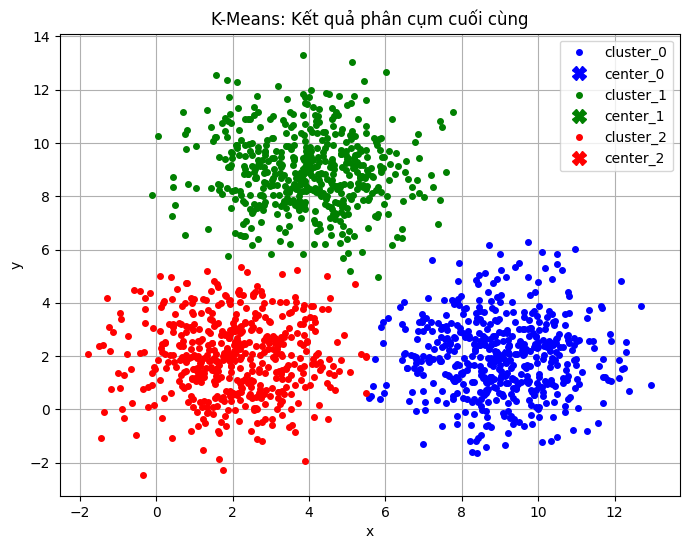


2. DEMO K-NN CLASSIFICATION: Phân loại dữ liệu 100 điểm thành 4 lớp.
------------------------------------------------------------
[K-NN] Giá trị K tối ưu tìm được bằng GridSearchCV: K = 2
[K-NN] Điểm dữ liệu mới: [5 5]
[K-NN] Dự đoán nhãn (class) cho điểm mới là: 1


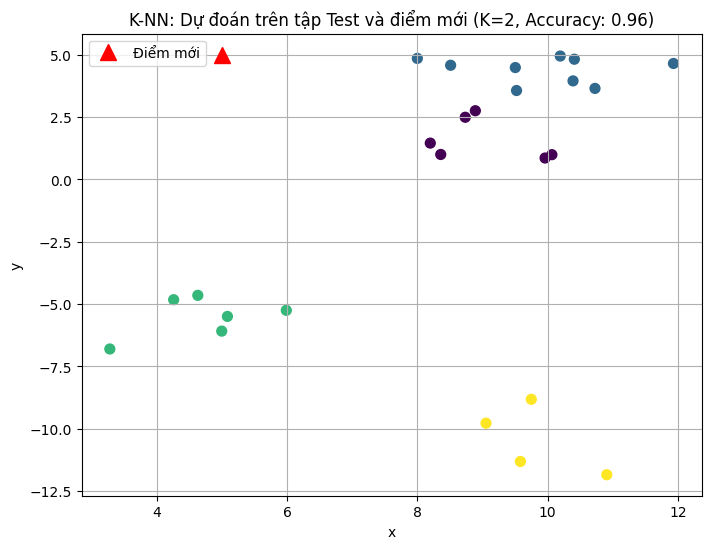

             DEMO HOÀN TẤT             


In [11]:
# Bài 3. Cài đặt ứng dụng demo cho 2 thuật toán trên.
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random

# --- I. KHỞI TẠO DỮ LIỆU ---

# Dữ liệu cho K-Means (3 cụm)
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X_kmeans = np.concatenate((X0, X1, X2), axis=0) # Tập dữ liệu K-Means

# Dữ liệu cho K-NN (4 lớp)
X_knn, y_knn = make_blobs(n_samples=100, n_features=2, centers=4,
                        cluster_std=1, random_state=4) # Tập dữ liệu K-NN
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, random_state=0)


# --- II. CÁC HÀM CỦA K-MEANS (Dựa trên Bài 1) ---

def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))

def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(8, 6))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    for i in range(n_cluster):
        data = X[labels == i, :]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + 'o', markersize=4,
                 label='cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1], plt_colors[i] + 'X', markersize=10,
                 label='center_' + str(i))

    plt.legend()
    plt.grid(True)
    plt.show()

def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    # Bước khởi tạo ban đầu (chỉ vẽ nhãn khởi tạo)
    # The original text had a citation here which was removed.
    # kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')

    while True:
        labels = kmeans_predict_labels(X, centers)

        # Bỏ qua visualize từng bước để giữ cho demo ngắn gọn, chỉ giữ visualize hội tụ
        # kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))

        new_centers = kmeans_update_centers(X, labels, n_cluster)

        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers

        # Bỏ qua visualize từng bước
        # kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))

        times += 1

    return (centers, labels, times)


# --- III. CHƯƠNG TRÌNH DEMO CHÍNH (Bài 3) ---

print("="*60)
print("             ỨNG DỤNG DEMO HỌC MÁY (K-Means & K-NN)             ")
print("="*60)
print("1. DEMO K-MEANS CLUSTERING: Phân chia tập dữ liệu 500 điểm thành 3 cụm.")
print("-" * 60)

random.seed(42)
init_centers = kmeans_init_centers(X_kmeans, n_cluster)
init_labels = np.zeros(X_kmeans.shape[0])

# Thực hiện K-Means
centers_final, labels_final, times_final = kmeans(init_centers, init_labels, X_kmeans, n_cluster)

print(f'\n[K-Means] Thuật toán đã hội tụ sau {times_final} lần lặp.')
print("Tọa độ tâm cụm cuối cùng:\n", centers_final.round(4))
kmeans_visualize(X_kmeans, centers_final, labels_final, n_cluster, 'K-Means: Kết quả phân cụm cuối cùng')


# --- K-NN DEMO ---
print("\n" + "="*60)
print("2. DEMO K-NN CLASSIFICATION: Phân loại dữ liệu 100 điểm thành 4 lớp.")
print("-" * 60)

# 2.1. Tìm K tối ưu bằng GridSearchCV (Dựa trên Bài 2)
param_grid = {'n_neighbors': np.arange(1, 10)}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=param_grid, cv=5)
knn_grid.fit(X_knn, y_knn)
K_optimal = knn_grid.best_params_['n_neighbors']
print(f"[K-NN] Giá trị K tối ưu tìm được bằng GridSearchCV: K = {K_optimal}")

# 2.2. Huấn luyện mô hình K-NN với K tối ưu
knn_optimal = KNeighborsClassifier(K_optimal)
knn_optimal.fit(X_train, y_train)

# 2.3. Dự đoán một điểm mới
new_point = np.array([[5, 5]])
prediction = knn_optimal.predict(new_point)

print(f"[K-NN] Điểm dữ liệu mới: {new_point[0]}")
print(f"[K-NN] Dự đoán nhãn (class) cho điểm mới là: {prediction[0]}")

# 2.4. Trực quan hóa kết quả dự đoán trên tập kiểm tra
y_pred_optimal = knn_optimal.predict(X_test)
accuracy = knn_optimal.score(X_test, y_test)

plt.figure(figsize=(8, 6))
# Vẽ tập kiểm tra, màu sắc theo nhãn dự đoán
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_optimal, marker='o', s=50, cmap='viridis')
# Vẽ điểm mới dự đoán (đánh dấu bằng hình tam giác)
plt.plot(new_point[0, 0], new_point[0, 1], 'r^', markersize=12, label='Điểm mới')
plt.title(f'K-NN: Dự đoán trên tập Test và điểm mới (K={K_optimal}, Accuracy: {accuracy:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("="*60)
print("             DEMO HOÀN TẤT             ")
print("="*60)

IV. Bài tập về nhà

Bài 4. Mô tả ứng dụng và cài đặt demo ứng dụng với 2 thuật toán trên.

Bài 5. Mô tả ứng dụng và cài đặt demo ứng dụng với các thuật toán được học trên lớp lý
thuyết.


--- KẾT QUẢ DEMO BÀI TẬP VỀ NHÀ ---

--- DEMO K-MEANS: PHÂN KHÚC KHÁCH HÀNG ---


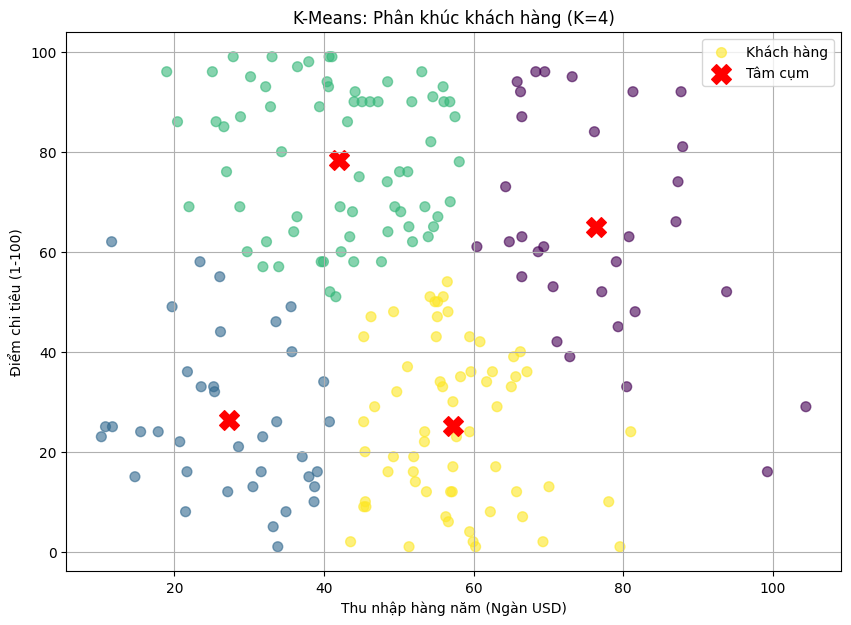

Đã phân loại 199 khách hàng thành 4 phân khúc.
Tâm cụm (Đặc trưng của Phân khúc - Thu nhập, Chi tiêu):
 [[76.38 64.97]
 [27.31 26.41]
 [41.95 78.35]
 [57.28 25.17]]

--- DEMO K-NN: PHÂN LOẠI IRIS (Classification) ---
Độ chính xác của K-NN (K=5) trên tập kiểm tra: 1.00
Đặc trưng mẫu mới: [5.1 3.5 1.4 0.2]
Dự đoán mẫu mới là loài: setosa


In [12]:
# Bài 4. Mô tả ứng dụng và cài đặt demo ứng dụng với 2 thuật toán trên.
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

print("\n--- KẾT QUẢ DEMO BÀI TẬP VỀ NHÀ ---")

# --- DEMO K-MEANS: PHÂN KHÚC KHÁCH HÀNG (Customer Segmentation) ---
print("\n--- DEMO K-MEANS: PHÂN KHÚC KHÁCH HÀNG ---")
# Tạo dữ liệu khách hàng giả định (ví dụ: Thu nhập (Income) và Điểm chi tiêu (Spending Score))
np.random.seed(42)
income = np.random.normal(loc=50, scale=20, size=200) # Thu nhập (nghìn USD)
spending = np.random.randint(1, 100, size=200)        # Điểm chi tiêu (1-100)
X_cust = np.vstack([income, spending]).T
X_cust = X_cust[(X_cust[:, 0] > 0) & (X_cust[:, 1] > 0)] # Loại bỏ giá trị âm

# Chuẩn hóa dữ liệu (quan trọng cho K-Means)
scaler = StandardScaler()
X_cust_scaled = scaler.fit_transform(X_cust)

K_cust = 4 # Chọn K=4 để phân thành 4 phân khúc khách hàng
kmeans_cust = KMeans(n_clusters=K_cust, random_state=42, n_init=10)
labels_cust = kmeans_cust.fit_predict(X_cust_scaled)
centers_cust = scaler.inverse_transform(kmeans_cust.cluster_centers_) # Đưa tâm cụm về lại thang đo gốc

# Trực quan hóa kết quả phân khúc
plt.figure(figsize=(10, 7))
plt.scatter(X_cust[:, 0], X_cust[:, 1], c=labels_cust, cmap='viridis', s=50, alpha=0.6, label='Khách hàng')
plt.scatter(centers_cust[:, 0], centers_cust[:, 1], c='red', marker='X', s=200, label='Tâm cụm')
plt.title(f'K-Means: Phân khúc khách hàng (K={K_cust})')
plt.xlabel('Thu nhập hàng năm (Ngàn USD)')
plt.ylabel('Điểm chi tiêu (1-100)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Đã phân loại {len(X_cust)} khách hàng thành {K_cust} phân khúc.")
print("Tâm cụm (Đặc trưng của Phân khúc - Thu nhập, Chi tiêu):\n", centers_cust.round(2))

# --- DEMO K-NN: PHÂN LOẠI IRIS (Phân loại ảnh/mẫu đơn giản) ---
print("\n--- DEMO K-NN: PHÂN LOẠI IRIS (Classification) ---")

# 1. Tải và chuẩn bị dữ liệu Iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
target_names = iris.target_names

# 2. Chia tập dữ liệu (Training/Test)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

# 3. Huấn luyện K-NN với K=5
K_iris = 5
knn_iris = KNeighborsClassifier(n_neighbors=K_iris)
knn_iris.fit(X_train_iris, y_train_iris)

# 4. Đánh giá
accuracy_iris = knn_iris.score(X_test_iris, y_test_iris)

# 5. Dự đoán mẫu mới
new_iris = np.array([[5.1, 3.5, 1.4, 0.2]]) # Ví dụ một bông Iris Setosa
prediction_iris = knn_iris.predict(new_iris)
predicted_class = target_names[prediction_iris[0]]

print(f"Độ chính xác của K-NN (K={K_iris}) trên tập kiểm tra: {accuracy_iris:.2f}")
print(f"Đặc trưng mẫu mới: {new_iris[0]}")
print(f"Dự đoán mẫu mới là loài: {predicted_class}")


--- DEMO HỒI QUY LOGISTIC: DỰ ĐOÁN VỠ NỢ TÍN DỤNG ---
Số lượng mẫu huấn luyện: 210
Số lượng mẫu kiểm tra: 90
Độ chính xác (Accuracy) của mô hình: 0.9889

Ma trận nhầm lẫn (Confusion Matrix):
[[48  0]
 [ 1 41]]

Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.98      0.99        42

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



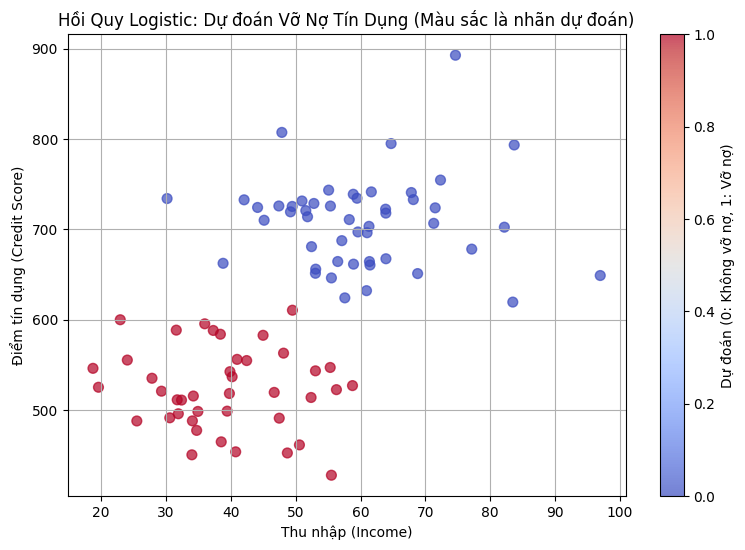


--- DỰ ĐOÁN KHÁCH HÀNG MỚI ---
Khách hàng 1 (Inc=80, CS=750): Dự đoán KHÔNG VỠ NỢ. Xác suất vỡ nợ: 0.00
Khách hàng 2 (Inc=30, CS=500): Dự đoán VỠ NỢ. Xác suất vỡ nợ: 1.00


In [13]:
# Bài 5. Mô tả ứng dụng và cài đặt demo ứng dụng với các thuật toán được học trên lớp lý thuyết.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\n--- DEMO HỒI QUY LOGISTIC: DỰ ĐOÁN VỠ NỢ TÍN DỤNG ---")

# 1. TẠO DỮ LIỆU GIẢ ĐỊNH (Gồm 2 đặc trưng: Thu nhập (Income) và Điểm tín dụng (Credit Score))
np.random.seed(42)
n_samples = 300

# Tạo dữ liệu cho người KHÔNG vỡ nợ (Default = 0)
income_0 = np.random.normal(loc=60, scale=15, size=n_samples // 2)
credit_score_0 = np.random.normal(loc=700, scale=50, size=n_samples // 2)

# Tạo dữ liệu cho người VỠ NỢ (Default = 1)
income_1 = np.random.normal(loc=40, scale=10, size=n_samples // 2)
credit_score_1 = np.random.normal(loc=550, scale=60, size=n_samples // 2)

# Kết hợp dữ liệu
data = pd.DataFrame({
    'Income': np.concatenate([income_0, income_1]),
    'Credit_Score': np.concatenate([credit_score_0, credit_score_1]),
    'Default': np.concatenate([np.zeros(n_samples // 2), np.ones(n_samples // 2)])
})

X = data[['Income', 'Credit_Score']]
y = data['Default']

# 2. CHIA TẬP DỮ LIỆU
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. HUẤN LUYỆN MÔ HÌNH HỒI QUY LOGISTIC
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 4. ĐÁNH GIÁ MÔ HÌNH
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Số lượng mẫu huấn luyện: {len(X_train)}")
print(f"Số lượng mẫu kiểm tra: {len(X_test)}")
print(f"Độ chính xác (Accuracy) của mô hình: {accuracy:.4f}")
print("\nMa trận nhầm lẫn (Confusion Matrix):")
print(conf_matrix)
print("\nBáo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred))

# 5. TRỰC QUAN HÓA KẾT QUẢ DỰ ĐOÁN
plt.figure(figsize=(9, 6))

# Vẽ các điểm kiểm tra và tô màu theo dự đoán
plt.scatter(X_test['Income'], X_test['Credit_Score'],
            c=y_pred, cmap='coolwarm', marker='o', s=50, alpha=0.7)

# Thêm đường biên quyết định (Decision Boundary)
# Tuy nhiên, vẽ ranh giới cho Logistic Regression 2D khá phức tạp, ta chỉ vẽ
# kết quả dự đoán để trực quan hóa
plt.title('Hồi Quy Logistic: Dự đoán Vỡ Nợ Tín Dụng (Màu sắc là nhãn dự đoán)')
plt.xlabel('Thu nhập (Income)')
plt.ylabel('Điểm tín dụng (Credit Score)')
plt.colorbar(label='Dự đoán (0: Không vỡ nợ, 1: Vỡ nợ)')
plt.grid(True)
plt.show()

# 6. DỰ ĐOÁN MỘT KHÁCH HÀNG MỚI
print("\n--- DỰ ĐOÁN KHÁCH HÀNG MỚI ---")
# Khách hàng 1: Thu nhập cao (80), Điểm tín dụng tốt (750) -> Dự kiến: Không vỡ nợ (0)
new_customer_1 = pd.DataFrame([{'Income': 80, 'Credit_Score': 750}])
pred_1 = model.predict(new_customer_1)[0]
prob_1 = model.predict_proba(new_customer_1)[0, 1]

# Khách hàng 2: Thu nhập thấp (30), Điểm tín dụng kém (500) -> Dự kiến: Vỡ nợ (1)
new_customer_2 = pd.DataFrame([{'Income': 30, 'Credit_Score': 500}])
pred_2 = model.predict(new_customer_2)[0]
prob_2 = model.predict_proba(new_customer_2)[0, 1]

print(f"Khách hàng 1 (Inc=80, CS=750): Dự đoán {'VỠ NỢ' if pred_1 == 1 else 'KHÔNG VỠ NỢ'}. Xác suất vỡ nợ: {prob_1:.2f}")
print(f"Khách hàng 2 (Inc=30, CS=500): Dự đoán {'VỠ NỢ' if pred_2 == 1 else 'KHÔNG VỠ NỢ'}. Xác suất vỡ nợ: {prob_2:.2f}")